In [1]:
# Deep Learning Applications: Gradients and Information Theory
# Week 4: Understanding Curves, Gradients, and Information Theory
# Duration: 1 Hour

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import heapq
import math
import seaborn as sns
from scipy.optimize import minimize_scalar
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


🔵 PART 4: INFORMATION THEORY
From Claude Shannon to modern deep learning!
📊 Text Analysis:
   • Total characters: 313
   • Unique characters: 30
   • Entropy: 4.268 bits per character
   • Max possible entropy: 4.907 bits


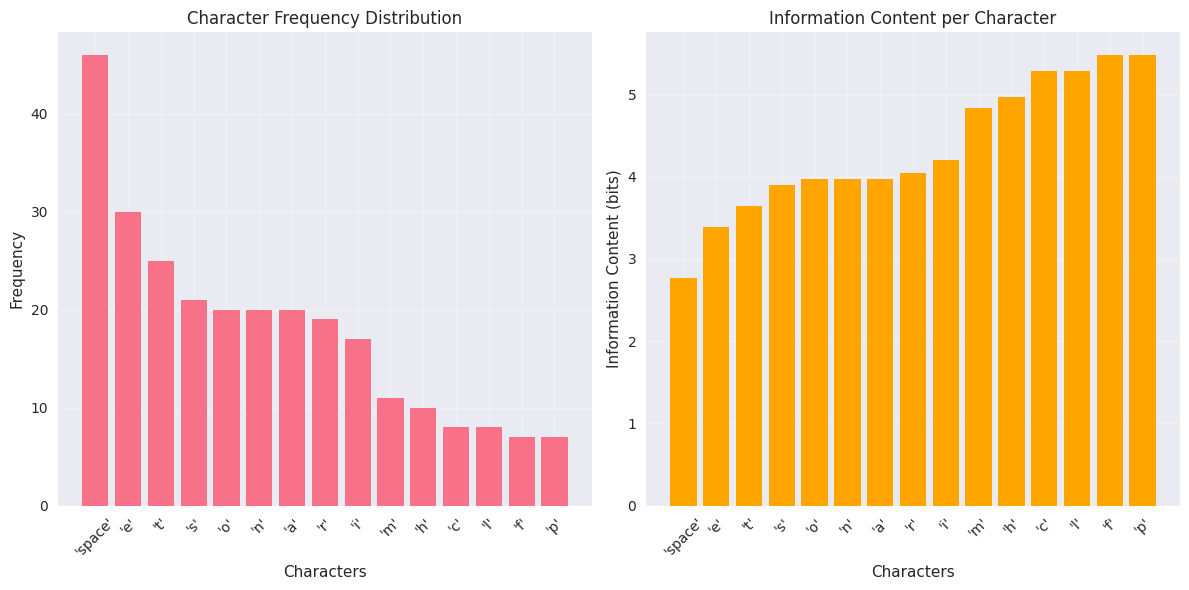


💡 Information Theory Insights:
   • Common characters (like 'e', space) have low information content
   • Rare characters carry more information (higher surprise)
   • Entropy measures average information content


In [2]:
## Part 4: Information Theory Basics (20 minutes)
print("\n🔵 PART 4: INFORMATION THEORY")
print("From Claude Shannon to modern deep learning!")

# Sample text for analysis
sample_text = """
The quick brown fox jumps over the lazy dog. This pangram contains every letter 
of the alphabet at least once. Information theory helps us understand how to 
compress and transmit messages efficiently. The more predictable a message, 
the less information it contains. Surprising events carry more information.
"""

def calculate_entropy(text):
    """Calculate entropy of a text string"""
    # Count character frequencies
    # @TODO
    char_counts = Counter(text.lower())
    total_chars = len(text)

    # Calculate probabilities
    probs = [count/total_chars for count in char_counts.values()]

    # Calculate entropy
    entropy = -sum(p * math.log2(p) for p in probs if p > 0)

    return entropy, char_counts

# Analyze our sample text
entropy, char_counts = calculate_entropy(sample_text)

print(f"📊 Text Analysis:")
print(f"   • Total characters: {len(sample_text)}")
print(f"   • Unique characters: {len(char_counts)}")
print(f"   • Entropy: {entropy:.3f} bits per character")
print(f"   • Max possible entropy: {math.log2(len(char_counts)):.3f} bits")

# Visualize character frequencies
most_common = char_counts.most_common(15)
chars, counts = zip(*most_common)

plt.figure(figsize=(12, 6))

# Character frequency plot
plt.subplot(1, 2, 1)
plt.bar(range(len(chars)), counts)
plt.xticks(range(len(chars)), [f"'{c}'" if c != ' ' else "'space'" for c in chars], rotation=45)
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.title('Character Frequency Distribution')
plt.grid(True, alpha=0.3)

# Information content plot (surprise)
probabilities = [count/len(sample_text) for count in counts]
information_content = [-math.log2(p) for p in probabilities]

plt.subplot(1, 2, 2)
plt.bar(range(len(chars)), information_content, color='orange')
plt.xticks(range(len(chars)), [f"'{c}'" if c != ' ' else "'space'" for c in chars], rotation=45)
plt.xlabel('Characters')
plt.ylabel('Information Content (bits)')
plt.title('Information Content per Character')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Information Theory Insights:")
print("   • Common characters (like 'e', space) have low information content")
print("   • Rare characters carry more information (higher surprise)")
print("   • Entropy measures average information content")


🔵 CROSS ENTROPY EXAMPLE
Comparing different probability distributions
🎯 Scenario: Predicting next character after 'th'
Model           Cross Entropy   Performance
---------------------------------------------
Perfect         1.833           Excellent
Random          2.585           Good
Bad             4.127           Very Poor


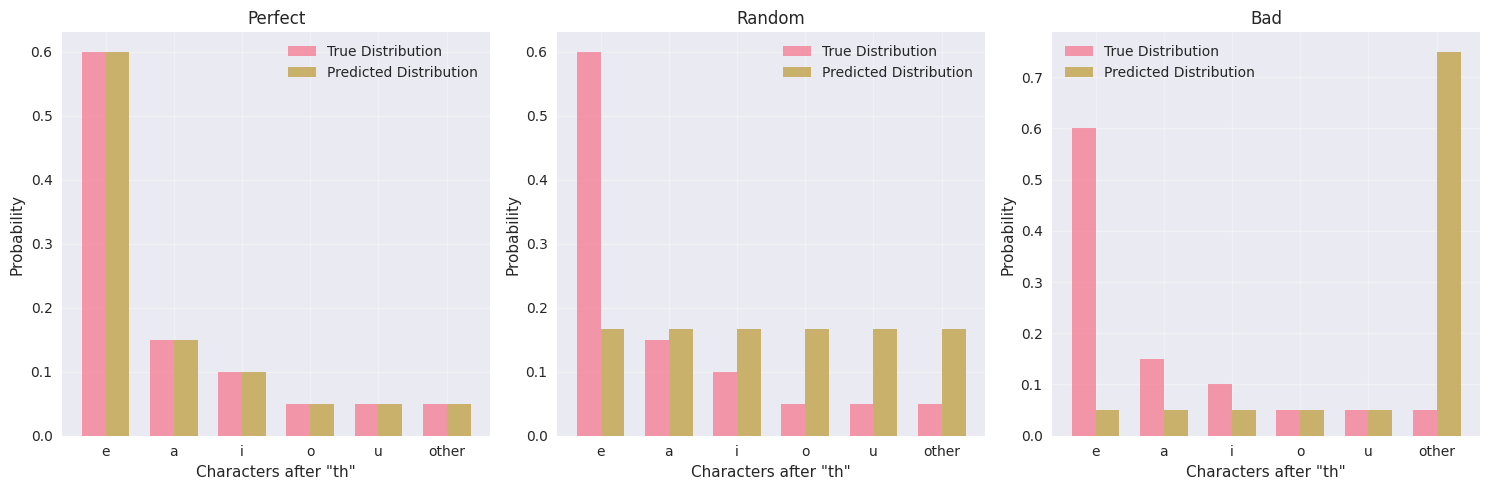

In [3]:
# Cross Entropy Example
print("\n🔵 CROSS ENTROPY EXAMPLE")
print("Comparing different probability distributions")

def cross_entropy(p_true, p_predicted):
    """Calculate cross entropy between true and predicted distributions"""
    # Avoid log(0) by adding small epsilon
    epsilon = 1e-15
    p_predicted = np.clip(p_predicted, epsilon, 1 - epsilon)
    return -np.sum(p_true * np.log2(p_predicted))

# Example: Predicting next character probabilities
print("🎯 Scenario: Predicting next character after 'th'")

# True distribution (what actually happens after 'th')
true_chars = ['e', 'a', 'i', 'o', 'u', 'other']
true_probs = np.array([0.6, 0.15, 0.1, 0.05, 0.05, 0.05])  # 'e' is most common after 'th'

# Different prediction models
models = {
    'Perfect': true_probs,
    'Random': np.array([1/6] * 6), # uniform dist
    'Bad': np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.75]) # thinks 'other' most likely
}

print(f"{'Model':<15} {'Cross Entropy':<15} {'Performance'}")
print("-" * 45)

for model_name, predicted_probs in models.items():
    ce = cross_entropy(true_probs, predicted_probs)
    if ce < 2:
        performance = "Excellent"
    elif ce < 3:
        performance = "Good"
    elif ce < 4:
        performance = "Poor"
    else:
        performance = "Very Poor"
    
    print(f"{model_name:<15} {ce:<15.3f} {performance}")

# Visualize the distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
width = 0.35
x_pos = np.arange(len(true_chars))

for i, (model_name, predicted_probs) in enumerate(models.items()):
    ax = axes[i]
    ax.bar(x_pos - width/2, true_probs, width, label='True Distribution', alpha=0.7)
    ax.bar(x_pos + width/2, predicted_probs, width, label='Predicted Distribution', alpha=0.7)
    ax.set_xlabel('Characters after "th"')
    ax.set_ylabel('Probability')
    ax.set_title(f'{model_name}')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(true_chars)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
